<a href="https://colab.research.google.com/github/minoooo119/deeplearning_study/blob/main/softmax_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random
USE_CUDA = torch.cuda.is_available() # GPU를 사용가능하면 True, 아니라면 False를 리턴
device = torch.device("cuda" if USE_CUDA else "cpu") # GPU 사용 가능하면 사용하고 아니면 CPU 사용
print("다음 기기로 학습합니다:", device)

# for reproducibility
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)
 # hyperparameters
training_epochs = 30
batch_size = 100
# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

# dataset loader
data_loader = DataLoader(dataset=mnist_train,
                                          batch_size=batch_size, # 배치 크기는 100
                                          shuffle=True,
                                          drop_last=True)
# MNIST data image of shape 28 * 28 = 784
linear = nn.Linear(784, 10, bias=True).to(device)

# 비용 함수와 옵티마이저 정의
criterion = nn.CrossEntropyLoss().to(device) # 내부적으로 소프트맥스 함수를 포함하고 있음.
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

for epoch in range(training_epochs): # 앞서 training_epochs의 값은 15로 지정함.
    avg_cost = 0
    total_batch = len(data_loader)

    for X, Y in data_loader:
        # 배치 크기가 100이므로 아래의 연산에서 X는 (100, 784)의 텐서가 된다.
        X = X.view(-1, 28 * 28).to(device)
        # 레이블은 원-핫 인코딩이 된 상태가 아니라 0 ~ 9의 정수.
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')



다음 기기로 학습합니다: cpu
Epoch: 0001 cost = 0.535150588
Epoch: 0002 cost = 0.359577775
Epoch: 0003 cost = 0.331264287
Epoch: 0004 cost = 0.316404670
Epoch: 0005 cost = 0.307107031
Epoch: 0006 cost = 0.300456554
Epoch: 0007 cost = 0.294933408
Epoch: 0008 cost = 0.290956199
Epoch: 0009 cost = 0.287074089
Epoch: 0010 cost = 0.284515619
Epoch: 0011 cost = 0.281914055
Epoch: 0012 cost = 0.279526889
Epoch: 0013 cost = 0.277636588
Epoch: 0014 cost = 0.275874764
Epoch: 0015 cost = 0.274422795
Epoch: 0016 cost = 0.272883654
Epoch: 0017 cost = 0.271629602
Epoch: 0018 cost = 0.270609796
Epoch: 0019 cost = 0.269295007
Epoch: 0020 cost = 0.268277347
Epoch: 0021 cost = 0.267255485
Epoch: 0022 cost = 0.266613454
Epoch: 0023 cost = 0.265661418
Epoch: 0024 cost = 0.264922291
Epoch: 0025 cost = 0.263888717
Epoch: 0026 cost = 0.263269782
Epoch: 0027 cost = 0.262586117
Epoch: 0028 cost = 0.261751652
Epoch: 0029 cost = 0.261135817
Epoch: 0030 cost = 0.260536909
Learning finished


Epoch: 0001 cost = 0.260275453
Epoch: 0002 cost = 0.259709090
Epoch: 0003 cost = 0.258947134
Epoch: 0004 cost = 0.258617997
Epoch: 0005 cost = 0.258048773
Epoch: 0006 cost = 0.257542819
Epoch: 0007 cost = 0.257166386
Epoch: 0008 cost = 0.256698728
Epoch: 0009 cost = 0.256314337
Epoch: 0011 cost = 0.255531222
Epoch: 0012 cost = 0.254914343
Epoch: 0013 cost = 0.254686505
Epoch: 0014 cost = 0.254367441
Epoch: 0015 cost = 0.254017055
Epoch: 0016 cost = 0.253749520
Epoch: 0017 cost = 0.253456146
Epoch: 0018 cost = 0.252950668
Epoch: 0019 cost = 0.252728969
Epoch: 0020 cost = 0.252436072
Epoch: 0021 cost = 0.252046257
Epoch: 0022 cost = 0.251570165
Epoch: 0023 cost = 0.251367420
Epoch: 0024 cost = 0.251246393
Epoch: 0025 cost = 0.251039475
Epoch: 0026 cost = 0.250813097
Epoch: 0027 cost = 0.250424027
Epoch: 0028 cost = 0.250028580
Epoch: 0029 cost = 0.250024080
Epoch: 0030 cost = 0.249757975
Learning finished
Accuracy: 0.869700014591217
Label:  8
Prediction:  8


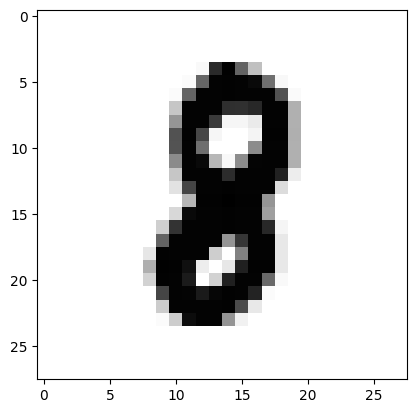

In [45]:
for epoch in range(training_epochs): # 앞서 training_epochs의 값은 15로 지정함.
    avg_cost = 0
    total_batch = len(data_loader)

    for X, Y in data_loader:
        # 배치 크기가 100이므로 아래의 연산에서 X는 (100, 784)의 텐서가 된다.
        X = X.view(-1, 28 * 28).to(device)
        # 레이블은 원-핫 인코딩이 된 상태가 아니라 0 ~ 9의 정수.
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')


Accuracy: 0.869700014591217
Label:  9
Prediction:  9


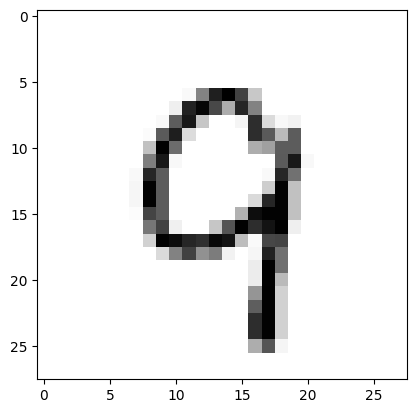

In [50]:
# 테스트 데이터를 사용하여 모델을 테스트한다.
with torch.no_grad(): # torch.no_grad()를 하면 gradient 계산을 수행하지 않는다.
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # MNIST 테스트 데이터에서 무작위로 하나를 뽑아서 예측을 해본다
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()